# En este notebook realitze algunes gràfiques per a la presentació
Empre la biblioteca pybinding, pero no realitze cap càlcul amb ella, sols l'empre perquè facilita generar alguns gràfics

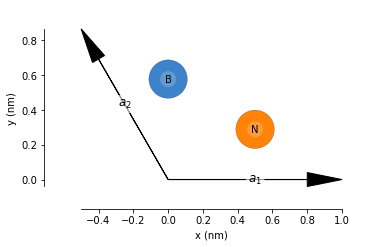

In [1]:
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
import pybinding as pb

#Empre coordenades reduides, tot dividit entre a
def monolayer_BN():
    lat = pb.Lattice(a1=[1, 0],
                     a2=[-1/2, 1/2 * sqrt(3)])
    lat.add_sublattices(('B', [0, sqrt(3)/3 ]),
                        ('N', [1/2, sqrt(3)/6 ]))
    
    return lat

lattice = monolayer_BN()
lattice.plot(vector_position=[0,0])
plt.savefig("../Grafiques/Cela_Unitat.svg", dpi=600)

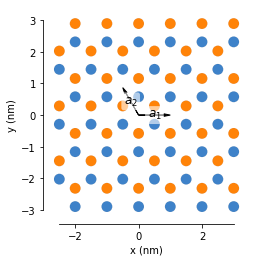

In [2]:
model= pb.Model(
    monolayer_BN(),
    pb.rectangle(6),  # nm
    pb.translational_symmetry(a1=False, a2=False)
)
model.plot()
model.lattice.plot_vectors(position=[0, 0])  # nm
plt.savefig("../Grafiques/Cristall.svg", dpi=600)

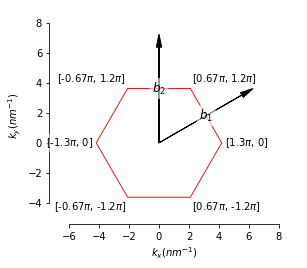

In [3]:
lattice.plot_brillouin_zone(decorate=True)
plt.savefig("../Grafiques/Zona_de_Brillouin.svg",dpi=600)

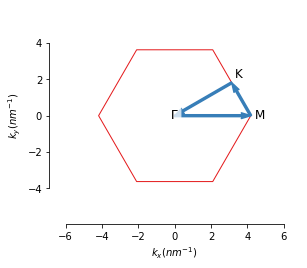

In [4]:
Gamma = [0, 0]
M = [pi , pi/sqrt(3)]
K = [4*pi/3, 0]

solver = pb.solver.lapack(model)
bands = solver.calc_bands(Gamma, K, M,Gamma)

lattice.plot_brillouin_zone(decorate=False)
bands.plot_kpath(point_labels=[r'$\Gamma$', 'M', 'K',r'$\Gamma$'])
plt.savefig("../Grafiques/Cami_zona_de_Brillouin.svg",dpi=600)